# Sovrin StagingNet Example: Verify Presentation

## Before running this notebook you should have run through [Part 2](http://127.0.0.1:8888/notebooks/Part%202%20-%20Connecting%20Issuer%20Agent%20to%20Sovrin%20Stagingnet.ipynb) and [Part 3](http://127.0.0.1:8888/notebooks/Part%203%20-%20Issuer.ipynb) of this tutorial.

If unfamiliar with the present-proof protocol it is worth reading through the [aries-rfs](https://github.com/hyperledger/aries-rfcs/tree/master/features/0037-present-proof)`


## Note that you do not need to write a public DID to the ledger as a verifier.

## 1. Instatiate Controller for Verifiers's Agent

In [1]:
%autoawait
import time
import asyncio
from termcolor import colored,cprint

from aries_basic_controller.aries_controller import AriesAgentController

WEBHOOK_HOST = "0.0.0.0"
WEBHOOK_PORT = 8052
WEBHOOK_BASE = ""
ADMIN_URL = "http://verifier-agent:8051"

# Based on the aca-py agent you wish to control
agent_controller = AriesAgentController(webhook_host=WEBHOOK_HOST, webhook_port=WEBHOOK_PORT,
                                       webhook_base=WEBHOOK_BASE, admin_url=ADMIN_URL)


IPython autoawait is `on`, and set to use `asyncio`


## 2. Register Listeners

The handler should get called every time the controller receives a webhook with the topic present_proof, printing out the payload. The agent calls to this webhook every time it receives a present proof protocol message from another agent. 


In [2]:
loop = asyncio.get_event_loop()
loop.create_task(agent_controller.listen_webhooks())

def connections_handler(payload):
    global STATE
    connection_id = payload["connection_id"]
    print("Connection message", payload, connection_id)
    STATE = payload['state']
    if STATE == 'active':
#         print('Connection {0} changed state to active'.format(connection_id))
        print(colored("Connection {0} changed state to active".format(connection_id), "red", attrs=["bold"]))


connection_listener = {
    "handler": connections_handler,
    "topic": "connections"
}

def proof_handler(payload):
    print("Handle present proof")
    print(payload)

proof_listener = {
    "topic": "present_proof",
    "handler": proof_handler
}

agent_controller.register_listeners([connection_listener,proof_listener], defaults=True)



## 3. Make a connection with the Mobile SSI Wallet you used in [Part 2](http://127.0.0.1:8888/notebooks/Part%202%20-%20Connecting%20Issuer%20Agent%20to%20Sovrin%20Stagingnet.ipynb)

**You should have a credential stored in here from the previous notebook!**

Please download a mobile SSI wallet such as [Connect.me](https://connect.me/), [Trinsic](https://trinsic.id/trinsic-wallet/) or any other Aries compatible wallet.

## 4. Create a connection invitation to scan with the Mobile SSI Wallet

## 4a. Check for any existing connections

In [3]:
# Check for existing connections
connection = await agent_controller.connections.get_connections()
print("EXISTING CONNECTIONS")
for key, value in connection.items():
    for item in value:
        print('ConnectionID:', item['connection_id'], 'Status:',item['state'])

EXISTING CONNECTIONS


## 4b. Create an Invitation

In [4]:
# Create Invitation
invite = await agent_controller.connections.create_invitation()
connection_id = invite["connection_id"]
print("Connection ID", connection_id)
print("Invitation")
print(invite['invitation_url'])
inviteURL = invite['invitation_url']

Connection ID 9833e3bc-d419-4a84-a5f2-130af083eedb
Invitation
https://51f831aadb91.ngrok.io?c_i=eyJAdHlwZSI6ICJkaWQ6c292OkJ6Q2JzTlloTXJqSGlxWkRUVUFTSGc7c3BlYy9jb25uZWN0aW9ucy8xLjAvaW52aXRhdGlvbiIsICJAaWQiOiAiNmZlOWQzOGQtNGMxYS00YzQzLThjNTgtZTM3YjQ1YTZmZjIzIiwgImxhYmVsIjogIlZlcmlmaWVyIiwgInNlcnZpY2VFbmRwb2ludCI6ICJodHRwczovLzUxZjgzMWFhZGI5MS5uZ3Jvay5pbyIsICJyZWNpcGllbnRLZXlzIjogWyJIRlN0ejNmeWRIY0dqYW5xcjhZWnY4UXNrWUx1dEFRZXdXZzh5OEdqZXF6YSJdfQ==
Connection message {'routing_state': 'none', 'initiator': 'self', 'invitation_mode': 'once', 'accept': 'auto', 'connection_id': '9833e3bc-d419-4a84-a5f2-130af083eedb', 'invitation_key': 'HFStz3fydHcGjanqr8YZv8QskYLutAQewWg8y8Gjeqza', 'updated_at': '2020-09-16 16:22:32.469455Z', 'created_at': '2020-09-16 16:22:32.469455Z', 'state': 'invitation'} 9833e3bc-d419-4a84-a5f2-130af083eedb


## 4c. Generate QR Code to be scanned with Mobile SSI Wallet

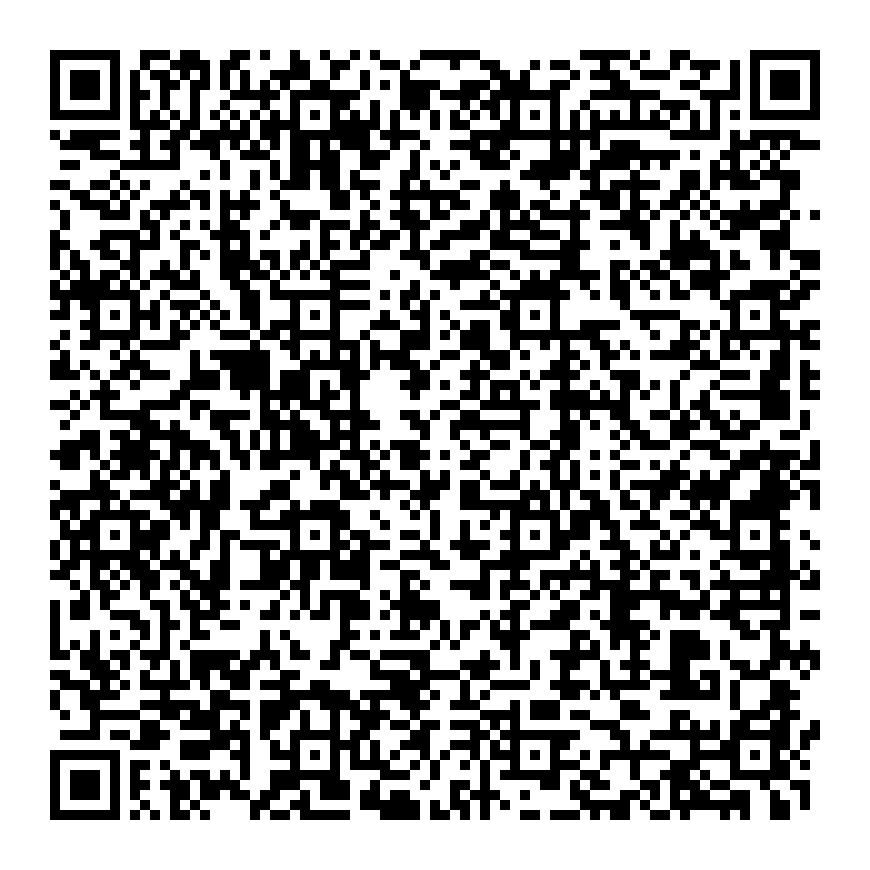

Connection message {'their_label': 'EAX', 'routing_state': 'none', 'initiator': 'self', 'invitation_mode': 'once', 'accept': 'auto', 'connection_id': '9833e3bc-d419-4a84-a5f2-130af083eedb', 'invitation_key': 'HFStz3fydHcGjanqr8YZv8QskYLutAQewWg8y8Gjeqza', 'their_did': 'WkaUqV7jeu9vV2Ysvu1Ey9', 'updated_at': '2020-09-16 16:22:47.796265Z', 'created_at': '2020-09-16 16:22:32.469455Z', 'state': 'request'} 9833e3bc-d419-4a84-a5f2-130af083eedb
Connection message {'my_did': '3qYccpMLgBkzX7kMdBkvWK', 'their_label': 'EAX', 'routing_state': 'none', 'initiator': 'self', 'invitation_mode': 'once', 'accept': 'auto', 'connection_id': '9833e3bc-d419-4a84-a5f2-130af083eedb', 'invitation_key': 'HFStz3fydHcGjanqr8YZv8QskYLutAQewWg8y8Gjeqza', 'their_did': 'WkaUqV7jeu9vV2Ysvu1Ey9', 'updated_at': '2020-09-16 16:22:47.828221Z', 'created_at': '2020-09-16 16:22:32.469455Z', 'state': 'response'} 9833e3bc-d419-4a84-a5f2-130af083eedb


In [5]:
import qrcode
# Link for connection invitation
input_data = inviteURL
# Creating an instance of qrcode
qr = qrcode.QRCode(
        version=1,
        box_size=10,
        border=5)
qr.add_data(input_data)
qr.make(fit=True)
img = qr.make_image(fill='black', back_color='white')
img.save('verifier_agent_invite_QRcode.png')

from IPython.display import Image
Image(width=400, filename='./verifier_agent_invite_QRcode.png')

## 4d. Check if established connection is in active state

In [6]:
import time

# print('Current state for ConnectionId {} is {}'.format(connection_id,STATE))
print(colored("Current state for ConnectionId {} is {}".format(connection_id,STATE), "magenta", attrs=["bold"]))
while STATE != 'active':
#     print('ConnectionId {0} is not in active state yet'.format(connection_id))
    print(colored("ConnectionId {0} is not in active state yet".format(connection_id), "yellow", attrs=["bold"]))
    trust_ping = await agent_controller.messaging.trust_ping(connection_id,'hello!')
#     print('Trust ping send to ConnectionId {0} to activate connection'.format(trust_ping))
    print(colored("Trust ping send to ConnectionId {0} to activate connection".format(trust_ping), "blue", attrs=["bold"]))
    time.sleep(5)
    
# print('ConnectionId: {0} is now active. Continue with notebook'.format(connection_id))
print(colored("ConnectionId: {0} is now active. Continue with notebook".format(connection_id), "green", attrs=["bold"]))


Current state for ConnectionId 9833e3bc-d419-4a84-a5f2-130af083eedb is response
ConnectionId 9833e3bc-d419-4a84-a5f2-130af083eedb is not in active state yet
Trust ping send to ConnectionId {'thread_id': 'f65b118d-5637-42a6-b787-d66c0cb91faf'} to activate connection
ConnectionId 9833e3bc-d419-4a84-a5f2-130af083eedb is not in active state yet
Connection message {'my_did': '3qYccpMLgBkzX7kMdBkvWK', 'their_label': 'EAX', 'routing_state': 'none', 'initiator': 'self', 'invitation_mode': 'once', 'accept': 'auto', 'connection_id': '9833e3bc-d419-4a84-a5f2-130af083eedb', 'invitation_key': 'HFStz3fydHcGjanqr8YZv8QskYLutAQewWg8y8Gjeqza', 'their_did': 'WkaUqV7jeu9vV2Ysvu1Ey9', 'updated_at': '2020-09-16 16:22:56.582199Z', 'created_at': '2020-09-16 16:22:32.469455Z', 'state': 'active'} 9833e3bc-d419-4a84-a5f2-130af083eedb
Connection 9833e3bc-d419-4a84-a5f2-130af083eedb changed state to active
Trust ping send to ConnectionId {'thread_id': 'f6b9cdef-98eb-4efc-bf8a-e1651746252f'} to activate connection

## 5. Send Proof Request to Identity Holder Mobile Wallet

## 5a. Generate Proof Request

Note how the verifier has restricted the proof request to only include credentials issued against a specific `schema_id`. 

In our case `schema_id` = EuEtnVakYFyBtGFT1nHYtH:2:SSI PyDentity Tutorial:0.0.1

If you ledgered your own schema in [Part 2](http://127.0.0.1:8888/notebooks/Part%203%20-%20Issuer.ipynb) and didn't use the pre-ledgered schema then please copy the new schema_id into the `schemaid` variable in the cell below.

TODO: Add information around predicates

In [9]:
schema_id = 'EuEtnVakYFyBtGFT1nHYtH:2:SSI PyDentity Tutorial:0.0.1'

print("Request proof of Fullname and Age range from Identity Holder")
#Set some variables

revocation = False
SELF_ATTESTED = True
exchange_tracing = False

#Enable this to ask for attributes to identity a user
#TODO - change restriction to schemaId or credentialId

req_attrs = [
    {"name": "fullname", "restrictions": [{"schema_id": schema_id}]},
    {"name": "skill", "restrictions": [{"schema_id": schema_id}]},
]

if revocation:
    req_attrs.append(
        {
            "name": "skill",
            "restrictions": [{"schema_id": schema_id}],
            "non_revoked": {"to": int(time.time() - 1)},
        },
    )

if SELF_ATTESTED:
    # test self-attested claims
    req_attrs.append({"name": "country"},)

#Set predicates for Zero Knowledge Proofs
req_preds = [
    # test zero-knowledge proofs
    {
        "name": "age",
        "p_type": ">=",
        "p_value": 21,
        "restrictions": [{"schema_id": schema_id}],
    }
]

indy_proof_request = {
    "name": "Proof of Completion of PyDentity SSI Tutorial",
    "version": "1.0",
    "requested_attributes": {
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
    },
    "requested_predicates": {
        f"0_{req_pred['name']}_GE_uuid":
        req_pred for req_pred in req_preds
    },
}

if revocation:
    indy_proof_request["non_revoked"] = {"to": int(time.time())}

#proof_request = indy_proof_request
exchange_tracing_id = exchange_tracing
proof_request_web_request = {
    "connection_id": connection_id,
    "proof_request": indy_proof_request,
    "trace": exchange_tracing,
}

Request proof of Fullname and Age range from Identity Holder


### 5b. Send the proof request to Identity Holder

Identity Holder is identified through the connection_id

In [10]:
response = await agent_controller.proofs.send_request(proof_request_web_request)
print(response)
presentation_exchange_id = response['presentation_exchange_id']
print("\n")
print(presentation_exchange_id)


{'trace': False, 'presentation_request': {'name': 'Proof of Completion of PyDentity SSI Tutorial', 'version': '1.0', 'requested_attributes': {'0_fullname_uuid': {'name': 'fullname', 'restrictions': [{'schema_id': 'EuEtnVakYFyBtGFT1nHYtH:2:SSI PyDentity Tutorial:0.0.1'}]}, '0_skill_uuid': {'name': 'skill', 'restrictions': [{'schema_id': 'EuEtnVakYFyBtGFT1nHYtH:2:SSI PyDentity Tutorial:0.0.1'}]}, '0_country_uuid': {'name': 'country'}}, 'requested_predicates': {'0_age_GE_uuid': {'name': 'age', 'p_type': '>=', 'p_value': 21, 'restrictions': [{'schema_id': 'EuEtnVakYFyBtGFT1nHYtH:2:SSI PyDentity Tutorial:0.0.1'}]}}, 'nonce': '997388198087810378958653'}, 'presentation_request_dict': {'@type': 'did:sov:BzCbsNYhMrjHiqZDTUASHg;spec/present-proof/1.0/request-presentation', '@id': '8da2d690-5b2c-491e-a4b4-d1fa25617fa8', 'request_presentations~attach': [{'@id': 'libindy-request-presentation-0', 'mime-type': 'application/json', 'data': {'base64': 'eyJuYW1lIjogIlByb29mIG9mIENvbXBsZXRpb24gb2YgUHlEZW5

## 6. Verify Proof Presentation

This is checking the signatures on the credentials presented against the credential schema and definition id stored and resolvable on the ledger. It is a bit of a big complicated object, so we show the common pattern for breaking it down, checking it's verified and accessing the data that has been presented.

In [11]:
verify = await agent_controller.proofs.verify_presentation(presentation_exchange_id)
print(verify)

Handle present proof
{'trace': False, 'presentation_request': {'name': 'Proof of Completion of PyDentity SSI Tutorial', 'version': '1.0', 'requested_attributes': {'0_fullname_uuid': {'name': 'fullname', 'restrictions': [{'schema_id': 'EuEtnVakYFyBtGFT1nHYtH:2:SSI PyDentity Tutorial:0.0.1'}]}, '0_skill_uuid': {'name': 'skill', 'restrictions': [{'schema_id': 'EuEtnVakYFyBtGFT1nHYtH:2:SSI PyDentity Tutorial:0.0.1'}]}, '0_country_uuid': {'name': 'country'}}, 'requested_predicates': {'0_age_GE_uuid': {'name': 'age', 'p_type': '>=', 'p_value': 21, 'restrictions': [{'schema_id': 'EuEtnVakYFyBtGFT1nHYtH:2:SSI PyDentity Tutorial:0.0.1'}]}}, 'nonce': '997388198087810378958653'}, 'presentation_request_dict': {'@type': 'did:sov:BzCbsNYhMrjHiqZDTUASHg;spec/present-proof/1.0/request-presentation', '@id': '8da2d690-5b2c-491e-a4b4-d1fa25617fa8', 'request_presentations~attach': [{'@id': 'libindy-request-presentation-0', 'mime-type': 'application/json', 'data': {'base64': 'eyJuYW1lIjogIlByb29mIG9mIENvbX

### Verifying the State

Once verified through the agent framework api, the state should be 'verified', otherwise the presentation is invalid.

In [12]:
print(verify['state'])
print(verify['state'] == 'verified')

verified
True


### Accessing the Revealed Attributes

In [13]:
print(verify['presentation'])
print(verify['presentation']['requested_proof'])

for (name, val) in verify['presentation']['requested_proof']['revealed_attrs'].items():
    print(name)
    print(val)
    ## This is the actual data that you want. It's a little hidden
    print(val['raw'])


{'proof': {'proofs': [{'primary_proof': {'eq_proof': {'revealed_attrs': {'fullname': '65692680133235931683304645877785134421502393178184295996723213988805392923415', 'skill': '38813097173523343342121686954087857232940954656654688676222283577873518606251'}, 'a_prime': '74621272954646413851033389675128816991437135463373688157493720142840661625639175765229445602777939248926175520403240817965993664710949256154838143984933160930336604623933696788113527071450081301865405220477258775258630592838164317142151866736108911429798118176125908675205321272425774362737940412693992216408486372220968174230270726200990153048390134704751516038649844398147333365343968432295978121420578640935464117679267643085790573563620669308863409721757879148386420669934253351601589056937340994200271071467526294123989460237699314768290971196513223921615202446609673959294502479769982682030011639055909946008326', 'e': '123970330644049869652032615636137920328751242417973550097360344664744229150924711920448300165121687628959

### Accessing self-attested attributes

In [15]:
for (name, val) in verify['presentation']['requested_proof']['self_attested_attrs'].items():
    print(name)
    ## Slightly different for self attested attrs
    print(val)

## End of Tutorial

Be sure to terminate the controller so you can run another tutorial.

In [24]:
response = await issuer_agent_controller.terminate()
print(response)
response = await agent_controller.terminate()
print(response)

None
None


## Well done on completing the PyDentity SSI training series!